# 911 Calls Capstone Project - Solutions

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)
!

## Data and Setup

In [96]:
import numpy as np
import pandas as pd

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [98]:
df = pd.read_csv('911.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [100]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


**the top 5 zipcodes for 911 calls**

In [101]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**the top 5 townships (twp) for 911 calls**

In [102]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**how many unique title codes are there**

In [103]:
df['title'].nunique()

110

**In the titles column there are "Reasons/Departments" specified before the title code** 

In [104]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

**the most common Reason for a 911 call**

In [105]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

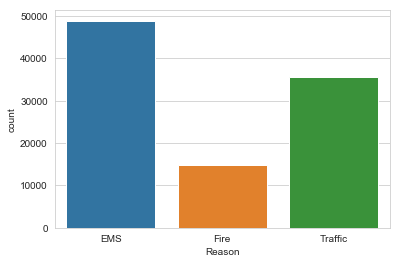

In [106]:
sns.countplot(x='Reason',data=df)

___
**Now let us begin to focus on time information. Datatype of timeStamp**

In [107]:
type(df['timeStamp'].iloc[0])

str

**convert the column from strings to DateTime objects.**

In [108]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [109]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [110]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [111]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1, 1),loc=)

SyntaxError: invalid syntax (<ipython-input-111-1a23efdd46ef>, line 4)

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
# It is missing some months! 9,10, and 11 are not there.

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

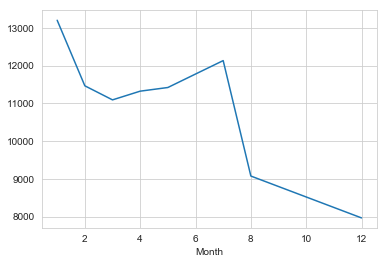

In [112]:
byMonth = df.groupby('Month').count()

byMonth.head()
byMonth['twp'].plot()

C:\Users\adarsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


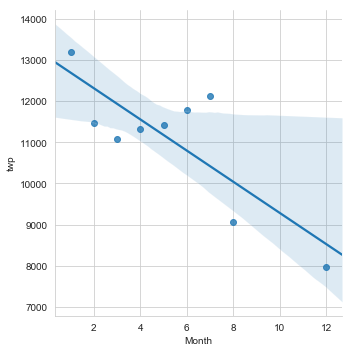

In [113]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column** 

In [114]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

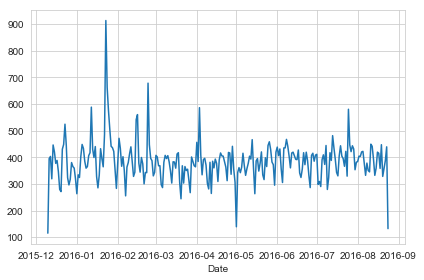

In [115]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

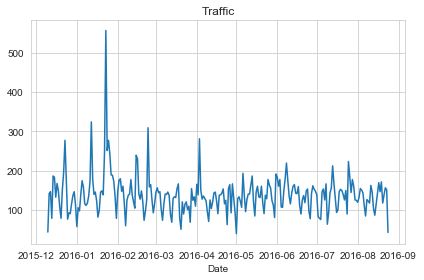

In [116]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

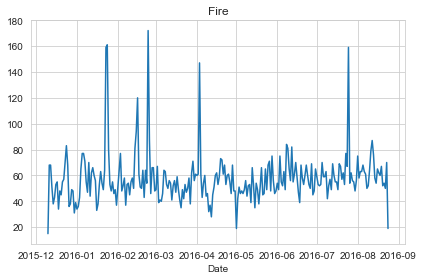

In [117]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

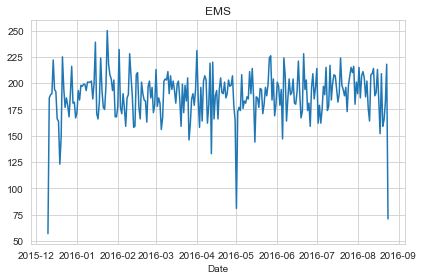

In [118]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [119]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

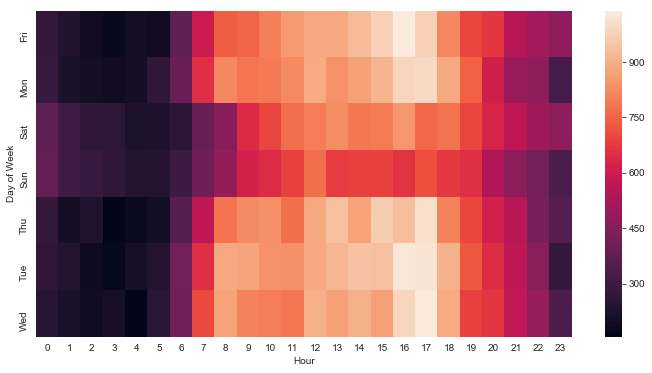

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

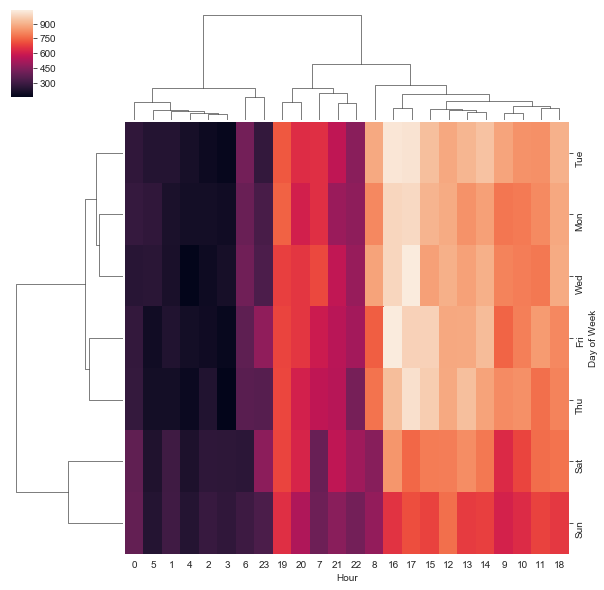

In [121]:
sns.clustermap(dayHour)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [122]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


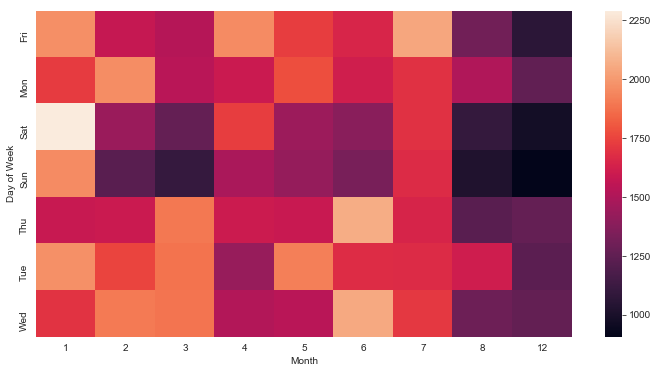

In [123]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

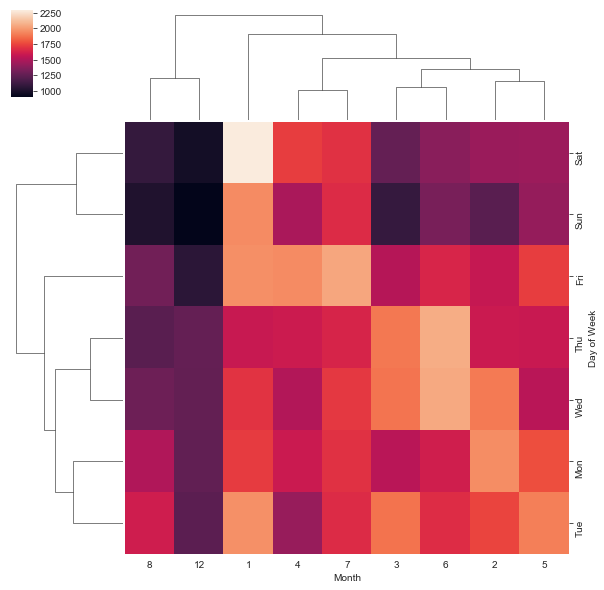

In [124]:
sns.clustermap(dayMonth)